<a href="https://colab.research.google.com/github/aldookware/auto-send-tweets/blob/master/contour_plot_2d_example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

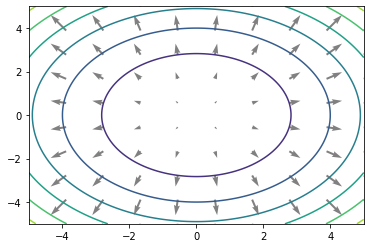

In [ ]:
import numpy as np
import jax.numpy as jnp
from jax import grad, vmap
import matplotlib.pyplot as plt

f = lambda x:   (x[0]**2 + x[1]**2)/2
x= jnp.array([1.9,1.0])
grad(f)(x)

# plot contour
def plot_2d_contour(f, xlim, ylim, gridsize=100): # f is an 2D function.
  xx = np.linspace(xlim[0], xlim[1], gridsize)
  yy = np.linspace(ylim[0], ylim[1], gridsize)
  X, Y = np.meshgrid(xx, yy)
  Z = np.vstack([X.ravel(), Y.ravel()])
  Zf=vmap(f)(Z.T).reshape((gridsize,gridsize))
  c = plt.contour(X, Y, Zf)

# plot the gradient field
def plot_2d_gradient_field(f, xlim, ylim, gridsize=10): # f is an 2D function.
  xx = np.linspace(xlim[0], xlim[1], gridsize)
  yy = np.linspace(ylim[0], ylim[1], gridsize)
  X, Y = np.meshgrid(xx, yy)
  Z = np.vstack([X.ravel(), Y.ravel()])
  GZ = vmap(grad(f))(Z.T)
  maxnorm = np.max(np.sqrt(np.sum(GZ**2,1)))
  G1Z = GZ[:,0].reshape((gridsize,gridsize))/(maxnorm)
  G2Z = GZ[:,1].reshape((gridsize,gridsize))/(maxnorm)
  plt.quiver(X, Y, G1Z, G2Z, units='xy', scale=1, color='gray')

plot_2d_contour(f, [-5,5], [-5,5], gridsize=100)
plot_2d_gradient_field(f, [-5,5], [-5,5], gridsize=10)